<a href="https://colab.research.google.com/github/aclaragonzalez/alura-voz/blob/main/modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importando os dados**

In [12]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [13]:
# estabelecendo o tema dos gráficos a serem plotados
sns.set_theme(style="darkgrid", palette="Paired", font_scale=1.2, rc={"figure.figsize":(13, 6)})

In [14]:
# leitura do arquivo csv que contem os dados
dados = pd.read_csv('./dados/alura-voz-vf.csv')

In [15]:
# apresentando as primeiras cinco linhas do dataframe
dados.head()

,clienteID,Cancelado,Gênero,Idoso,Cônjuge,Dependentes,Vigência,Serviço.Telefonico,Múltiplas.Linhas,Serviço.Internet,...,Proteção.Dispositivo,Suporte.Técnico,assinatura.TV,assinatura.Filmes,Contrato,Fatura.Digital,Método.Pagamento,Valor.Diário,Valor.Mensal,Valor.Total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Anual,Sim,Cheque via postal,19.78,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mensal,Não,Cheque via postal,18.08,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra óptica,...,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,9.36,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra óptica,...,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,41.26,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra óptica,...,Não,Sim,Sim,Não,Mensal,Sim,Cheque via postal,8.91,83.9,267.40


# **Aplicando encoder**

É preciso remover algumas colunas que não são tão importantes para a análise que desejamos realizar. Existem três colunas que não são interessantes para a análise e que serão removidas:

* Coluna clienteID: Seu valor é único para cada linha e não nos traz informação relevante para uma análise, então podemos retirá-la;

* Coluna Valor.Total: essa coluna contém informações dos meses de Valor.Mensal multiplicado pela Vigência do contrato, então é uma informação "duplicada"; e

* Coluna Valor.Diário: essa coluna contém também informações "duplicadas", visto que foi obtida a partir da divisão do Valor.Total por dias de contrato (Valor.Mensal dividido por 30)

In [16]:
dados.drop(['clienteID', 'Valor.Total', 'Valor.Diário'], axis=1, inplace=True)

Conforme verificado anteriormente, algumas colunas possuem dados como "Sem serviço telefônico" e "Sem serviço de internet". Vamos relembrar:

In [17]:
# verificando os dados em cada coluna

for column in dados.columns.tolist():
    print('Dados que podem ser encontrados da coluna %s:' % column)
    print(dados[column].unique())
    print(' ')
    print('------------------------------------------')
    print(' ')

Dados que podem ser encontrados da coluna Cancelado:
['Não' 'Sim']
 
------------------------------------------
 
Dados que podem ser encontrados da coluna Gênero:
['Feminino' 'Masculino']
 
------------------------------------------
 
Dados que podem ser encontrados da coluna Idoso:
['Não' 'Sim']
 
------------------------------------------
 
Dados que podem ser encontrados da coluna Cônjuge:
['Sim' 'Não']
 
------------------------------------------
 
Dados que podem ser encontrados da coluna Dependentes:
['Sim' 'Não']
 
------------------------------------------
 
Dados que podem ser encontrados da coluna Vigência:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
 
------------------------------------------
 
Dados que podem ser encontrados da coluna Serviço.Telefonico:
['Sim' 'Não']
 
-------------------------

Para as colunas com "Sem serviço de internet" e "Sem serviço telefônico", vamos considerar apenas como "Não" para evitar informações duplicadas. As colunas 'Método.Pagamento', 'Contrato' e 'Serviço.Internet' possuem mais de 2 categorias e por conta disso, faremos encoding para os dados dessas colunas.

In [18]:
colunas = ['Método.Pagamento', 'Contrato', 'Serviço.Internet']

In [19]:
dados2 = dados.drop(colunas, axis=1)

In [20]:
dicionario = {'Sem serviço de internet':0,
              'Sem serviço telefônico': 0,
              'Não': 0,
              'Sim': 1,
              'Masculino':0,
              'Feminino':1}

In [21]:
dados2 = dados2.replace(dicionario)

In [22]:
ohe = OneHotEncoder(dtype=int)

colunas_ohe = ohe.fit_transform(dados[colunas]).toarray()
dados3 = pd.concat([dados2, pd.DataFrame(colunas_ohe, columns=ohe.get_feature_names_out(colunas))], axis=1)

In [23]:
dados3.head()

,Cancelado,Gênero,Idoso,Cônjuge,Dependentes,Vigência,Serviço.Telefonico,Múltiplas.Linhas,Segurança.Online,Backup.Virtual,...,Método.Pagamento_Cartão de crédito,Método.Pagamento_Cheque eletrônico,Método.Pagamento_Cheque via postal,Método.Pagamento_Transferência bancária,Contrato_Anual,Contrato_Bienal,Contrato_Mensal,Serviço.Internet_DSL,Serviço.Internet_Fibra óptica,Serviço.Internet_Não
0,0,1,0,1,1,9,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,9,1,1,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,0,0,0,0,4,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,1,0,1,1,0,13,1,0,0,1,...,0,1,0,0,0,0,1,0,1,0
4,1,1,1,1,0,3,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0


Agora, temos dados apenas com valores numéricos.

# **Balanceamento dos dados**

[Text(0.5, 1.0, 'Distribuição da variável Cancelado')]

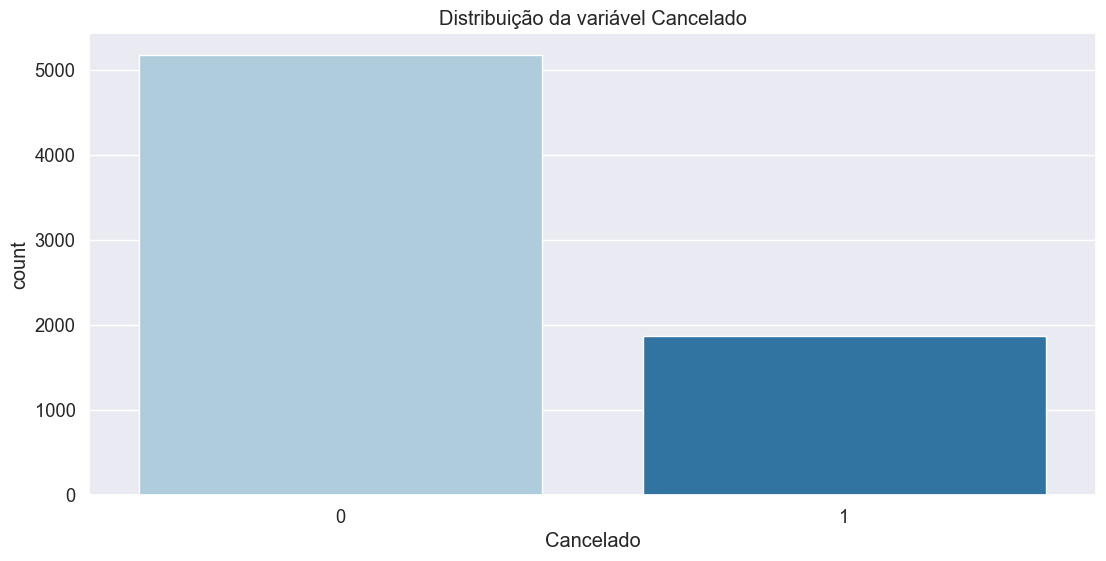

In [24]:
# plotando gráfico de Cancelado
sns.countplot(x='Cancelado', data=dados3).set(title='Distribuição da variável Cancelado')

Percebemos pelo gráfico acima que o conjunto de dados possui o alvo (coluna 'Cancelado') desbalanceado, caso o modelo seja criado com a variável dessa forma poderá prejudicar o aprendizados e os resultados.

Anteriormente, havia sido realizado um balanceamento dos dados com o método SMOTE da biblioteca imblearn. Mas agora iremos refazer o treinamento dos modelos sem esse balanceamento e ver como os modelos se comportam.

In [25]:
X = dados3.drop(['Cancelado'], axis = 1)
y = dados3['Cancelado']

# **Aplicando os modelos de Classificação**

In [26]:
# separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X , y, random_state=42)

## SVC

In [27]:
# treinando o modelo SVC
svc = SVC(random_state=42)
svc.fit(X_treino, y_treino)
y_pred_svc = svc.predict(X_teste)

[Text(0.5, 29.249999999999986, 'Valores verdadeiros'),
 Text(125.74999999999999, 0.5, 'Valores preditos')]

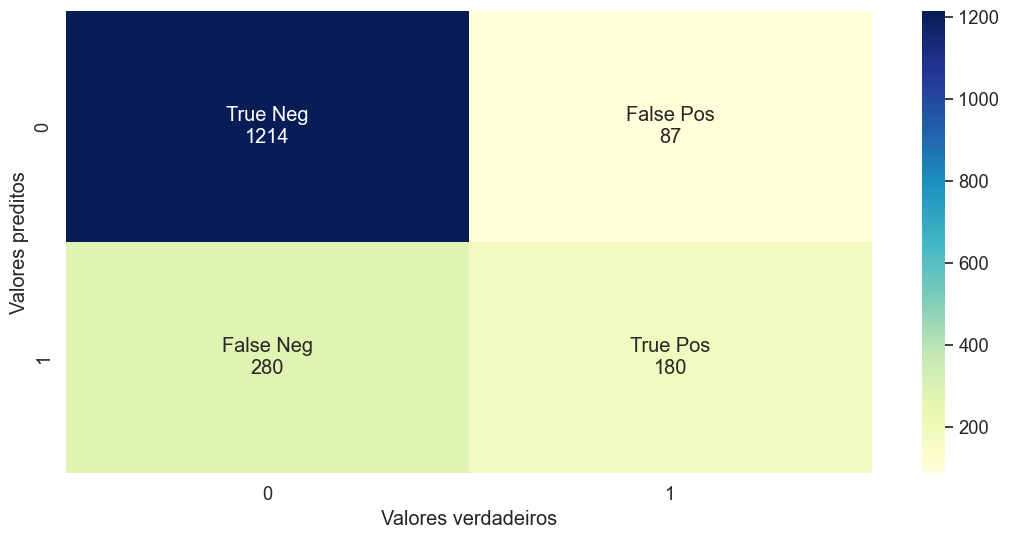

In [28]:
# obtendo matriz de confusão para SVC
cf_matrix = confusion_matrix(y_teste, y_pred_svc)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Não Cancelado", "Cancelado"]
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu').set(xlabel='Valores verdadeiros', ylabel='Valores preditos')

In [29]:
# obtendo métricas para SVC
acuracia_svc = accuracy_score(y_teste, y_pred_svc)
precision_svc = precision_score(y_teste, y_pred_svc)
recall_svc = recall_score(y_teste, y_pred_svc)
f1_svc = f1_score(y_teste, y_pred_svc)

y_pred_treino_svc = svc.predict(X_treino)
acuracia_treino_svc = accuracy_score(y_treino, y_pred_treino_svc)

## Decision Tree

In [30]:
# treinando o modelo DTree
dtree = DecisionTreeClassifier(max_depth=5, random_state = 42)
dtree.fit(X_treino, y_treino)
y_pred_dt = dtree.predict(X_teste)

<Axes: >

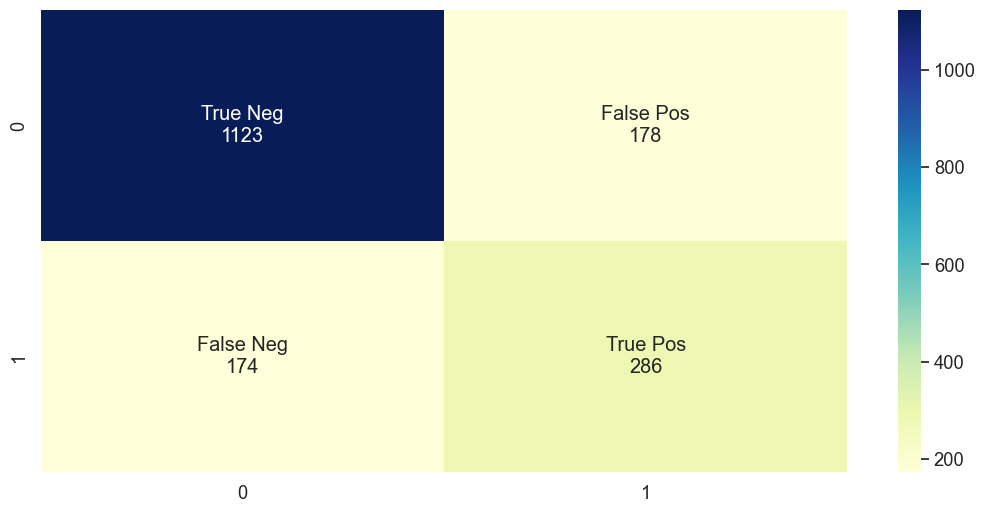

In [31]:
# obtendo matriz de confusão para DTree
cf_matrix = confusion_matrix(y_teste, y_pred_dt)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Não Cancelado", "Cancelado"]
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

In [32]:
# Obtendo métricas para DTree
acuracia_dt = accuracy_score(y_teste, y_pred_dt)
precision_dt = precision_score(y_teste, y_pred_dt)
recall_dt = recall_score(y_teste, y_pred_dt)
f1_dt = f1_score(y_teste, y_pred_dt)

y_pred_treino_dt = dtree.predict(X_treino)
acuracia_treino_dt = accuracy_score(y_treino, y_pred_treino_dt)

## Random Forest

In [33]:
# treinando o modelo RForest
rforest = RandomForestClassifier(max_depth = 5, random_state=42)
rforest.fit(X_treino, y_treino)
y_pred_rf = rforest.predict(X_teste)

<Axes: >

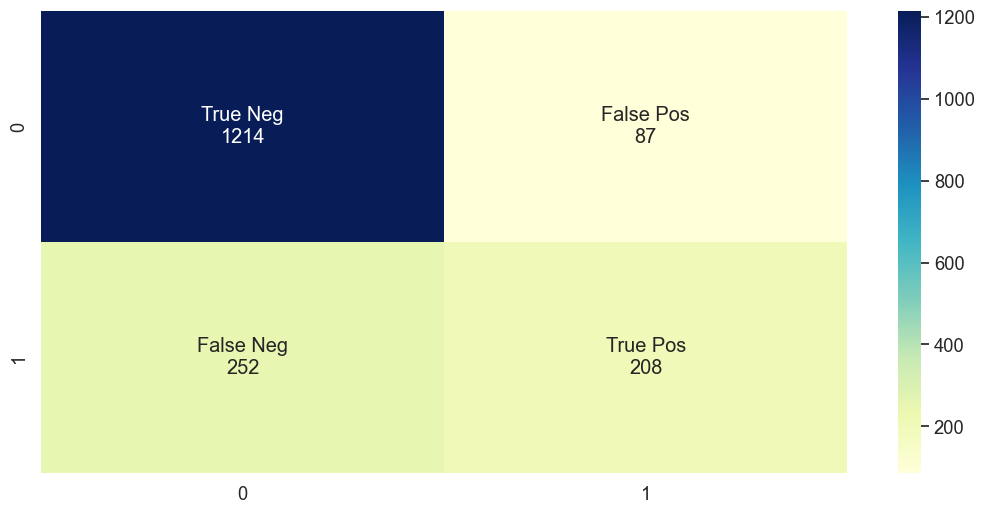

In [34]:
# obtendo matriz de confusão para RForest
cf_matrix = confusion_matrix(y_teste, y_pred_rf)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
categories = ["Não Cancelado", "Cancelado"]
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='YlGnBu')

In [35]:
# Obtendo métricas para RF
acuracia_rf = accuracy_score(y_teste, y_pred_rf)
precision_rf = precision_score(y_teste, y_pred_rf)
recall_rf = recall_score(y_teste, y_pred_rf)
f1_rf = f1_score(y_teste, y_pred_rf)

y_pred_treino_rf = rforest.predict(X_treino)
acuracia_treino_rf = accuracy_score(y_treino, y_pred_treino_rf)

# **Comparando os modelos**

In [36]:
# juntando as métricas em listas
acc = [acuracia_svc, acuracia_dt, acuracia_rf]
precision = [precision_svc, precision_dt, precision_rf]
recall = [recall_svc, recall_dt, recall_rf]
f1 = [f1_svc, f1_dt, f1_rf]
acc_treino = [acuracia_treino_svc, acuracia_treino_dt, acuracia_treino_rf]

In [37]:
# criando um dataframe com as métricas para todos os modelos utilizados
modelos = pd.DataFrame({'Modelo': ['SVC', 'Decision Tree', 'Random Forest'],  'Acurácia Treino': acc_treino,
                          'Acurácia Teste': acc, 'Precisão': precision, 'Recall': recall, 'F1-Score': f1})

In [38]:
modelos

,Modelo,Acurácia Treino,Acurácia Teste,Precisão,Recall,F1-Score
0,SVC,0.788906,0.791596,0.674157,0.391304,0.495186
1,Decision Tree,0.798183,0.800114,0.616379,0.621739,0.619048
2,Random Forest,0.803294,0.807496,0.705085,0.452174,0.550993


Ao analisar as métricas acima, podemos inferir que:
* Não há diferença relevante na utilização de dados balanceados, visto que as métricas obtidas com dados desbalanceados foram semelhantes.
* Todos os modelos apresentam acurácia relativamente próxima tanto nos dados de treino quanto nos de teste, sugerindo que não há grandes problemas de overfitting.
* Como a precisão mede a proporção de instâncias classificadas como positivas que realmente são positivas. Nesse caso, o modelo Random Forest obteve a maior precisão.
* O recall, ou chamado também de sensibilidade, mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Para essa métrica, o Decision Tree obteve o maior recall.
* O F1-Score é uma métrica que considera tanto a precisão quanto o recall. Neste caso, o Decision Tree tem o maior F1-Score.

Considerando essas métricas, não há um modelo claramente superior em todos os aspectos e a escolha do melhor modelo dependerá das prioridades específicas do problema. 

A avaliação das métricas deve considerar o contexto específico da aplicação e, portanto, se evitar falsos positivos for mais crítico, o Random Forest pode ser preferível. Se a identificação correta de instâncias positivas for mais importante, o Decision Tree pode ser uma escolha melhor.

Entendendo que o objetivo do projeto é evitar o cancelamento dos serviços da Alura Voz, seria mais relevante identificar os clientes que irão cancelar, isto é, identificar as instâncias positivas. Neste caso, o modelo Decision Tree é o que apresenta melhor desempenho para essa tarefa.